In [2]:
import pandas as pd
import importlib
import matplotlib.pyplot as plt
import stumpy
import numpy as np
import utils
importlib.reload(utils)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

<module 'utils' from 'c:\\LocalData\\pabflore\\encoder-pacman\\utils.py'>

In [3]:
user_df, ip_df, redcap_df, game_df, gamestate_df, psychometrics_df = utils.read_data()


In [31]:
pacman_ts = gamestate_df.loc[gamestate_df['game_id'] >= 716][['Pacman_X', 'Pacman_Y']]

pacman_ts.head()


,Pacman_X,Pacman_Y
360382,0.0,-9.498903
360383,0.0,-9.498903
360384,0.0,-9.498903
360385,0.0,-9.498903
360386,0.0,-9.498903


Text(0.5, 0.98, 'Can You Spot The Multi-dimensional Motif?')

Text(0, 0.5, 'Pacman_X')

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Pacman_Y')

Text(0.5, 0, 'Time')

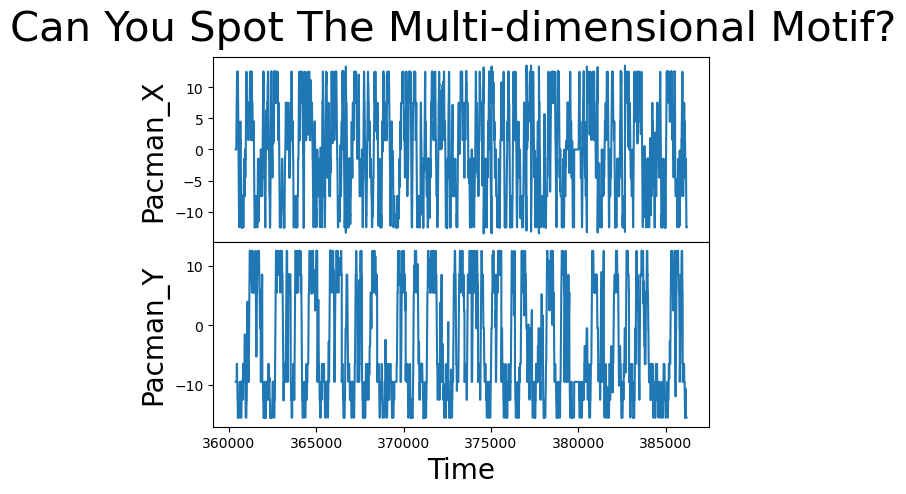

In [32]:
fig, axs = plt.subplots(pacman_ts.shape[1], sharex=True, gridspec_kw={'hspace': 0})
plt.suptitle('Can You Spot The Multi-dimensional Motif?', fontsize='30')

for i in range(pacman_ts.shape[1]):
    axs[i].set_ylabel(f'{pacman_ts.columns[i]}', fontsize='20')
    axs[i].set_xlabel('Time', fontsize ='20')
    axs[i].plot(pacman_ts.iloc[:,i])
    
plt.show()

In [ ]:
m = 300
mps = {}  # Store the 1-dimensional matrix profiles
motifs_idx = {}  # Store the index locations for each pair of 1-dimensional motifs (i.e., the index location of two smallest matrix profile values within each dimension)
for dim_name in pacman_ts.columns:
    mps[dim_name] = stumpy.stump(pacman_ts[dim_name], m)
    motif_distance = np.round(mps[dim_name][:, 0].astype(float).min(), 1)
    print(f"The motif pair matrix profile value in {dim_name} is {motif_distance}")
    motifs_idx[dim_name] = np.argsort(mps[dim_name][:, 0])[:2]